In [51]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string

In [52]:
def estimate_conv_mu(data):
    true_labels = data.index.unique().tolist()
    data_info   = pd.DataFrame(columns=['True Class Label', 'Covariance Matrix', 'Mean Vector', 'Number of Samples', 'Class Prior'])
    total_samples = 0
    for true_label in true_labels:
        temp = data.loc[true_label, :]
        #cov = np.cov(temp, bias=True)
        cov  = temp.cov().to_numpy()
        mean = temp.mean(axis=0).tolist()
        n = temp.shape[0]
        total_samples = total_samples + n
        d = {'True Class Label': true_label, 'Covariance Matrix': cov, 'Mean Vector': mean, 'Number of Samples': n}
        # data_info = data_info.append(d, ignore_index=True)
        new_row = pd.DataFrame([d])
        data_info = pd.concat([data_info, new_row], ignore_index=True)
    data_info['Class Prior'] = data_info['Number of Samples'] / total_samples
    return data_info

In [53]:
# wine_path = r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_A\wine+quality\winequality-red.csv'
wine_path = r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_A\wine+quality\winequality-white.csv'
wine_df = pd.read_csv(wine_path, delimiter=';', index_col='quality')
# print(wine_df)
data_info = estimate_conv_mu(data=wine_df)
# print(data_info)
wine_loss_matrix = [[0, 15,  20, 25, 30, 35, 40, 45, 50],
                    [15, 0,  10, 15, 20, 25, 30, 35, 40],
                    [20, 10, 0,  5,  10, 15, 20, 25, 30],
                    [25, 15, 5,  0,  1,  5,  10, 15, 20],
                    [30, 20, 10, 1,  0,  1,  1,  5,  10],
                    [35, 25, 15, 5,  1,  0,  10, 15, 20],
                    [40, 30, 20, 10, 1,  10, 0,  25, 30],
                    [45, 35, 25, 15, 5,  15, 25, 0,  40],
                    [50, 40, 30, 20, 10, 20, 30, 40, 0 ]]



[3, 4, 5, 6, 7, 8, 9]


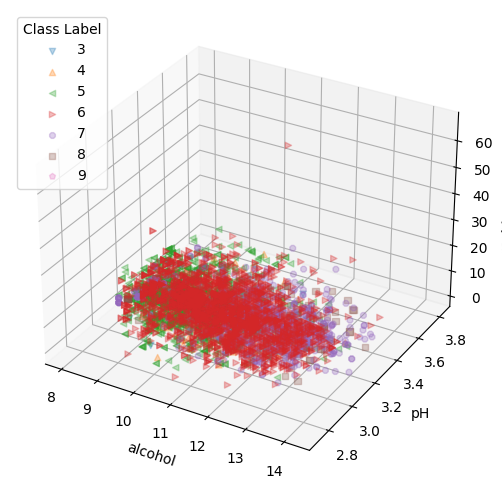

In [54]:
subset=['alcohol', 'pH', 'residual sugar']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
true_labels = wine_df.sort_index().index.unique().tolist()
print(true_labels)

for i, true_label in enumerate(true_labels):
    temp = wine_df.loc[true_label, :]
    # print(temp)
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3)
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
ax.legend(loc='upper left', title='Class Label')
plt.tight_layout()
plt.savefig('./%s_%s_%s_true_classes_1_white.png'%(subset[0], subset[1], subset[2]))

[3, 4, 5, 6, 7, 8, 9]


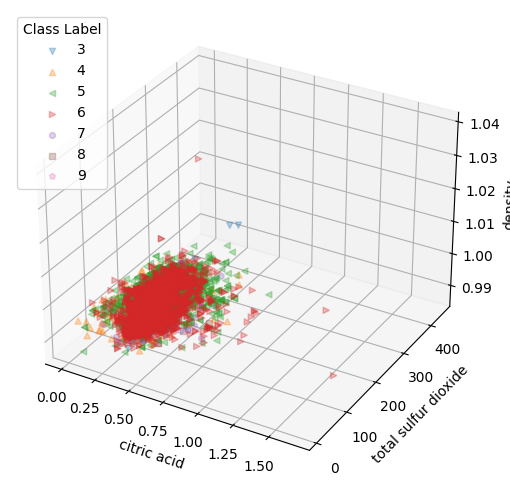

In [55]:
subset=['citric acid', 'total sulfur dioxide', 'density']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
true_labels = wine_df.sort_index().index.unique().tolist()
print(true_labels)

for i, true_label in enumerate(true_labels):
    temp = wine_df.loc[true_label, :]
    # print(temp)
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3)
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
ax.legend(loc='upper left', title='Class Label')
plt.tight_layout()
plt.savefig('./%s_%s_%s_true_classes_2_white.png'%(subset[0], subset[1], subset[2]))

In [56]:
def risk(i , x , loss_matrix, data_info):
    risk = 0
    for j, row in data_info.iterrows():
        #  Probability, mu, sigma^2
        try:
            #print(x)
            risk = risk + loss_matrix[i][int(row['True Class Label'])-1]*row['Class Prior']*multivariate_normal.pdf(x,row['Mean Vector'],row['Covariance Matrix'])
            #print(risk)
        except np.linalg.LinAlgError:
            continue
    return risk

In [57]:
data=wine_df
loss_matrix=wine_loss_matrix
true_class_label='quality'
choices  = []
correct = []
dimension_labels = data.columns.tolist()
class_labels     = data.sort_index().index.unique().tolist()
# Create 0-1 loss matrix if none is given
if(loss_matrix==None):
    d = max(class_labels)
    loss_matrix = np.zeros((d,d))
    for i in range(0,d):
        for j in range(0,d):
            if(i==j):
                loss_matrix[i][j] = 0
            else:
                loss_matrix[i][j] = 1
print(loss_matrix)
labels_reference  = {i:class_labels[i] for i in range(0,len(class_labels))}
for idx, row in data.iterrows():
    # Modify class label for computation
    distribution = int(row.name)
    rows         = [row[dimension_label] for dimension_label in dimension_labels]
    #print(rows)
    #print(class_labels)
    args         = [risk(class_label-1, rows, loss_matrix, data_info) for class_label in class_labels]
    choice = labels_reference[np.argmin(args)]
    choices.append(choice)
    # print('Choice: %d'%choice)
    # print('Correct: %d'%distribution)
    # Check if classification was correct or not
    if(choice==distribution):
        correct.append(True)
        # print('Correct!: %d'%len(correct))
    else:
        correct.append(False)
data['ERM Classification'] = choices
data['Correct']            = correct
# print(wine_df)
# return data
wine_df =data
wine_df.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_B\wine_df__white_data.csv')

[[0, 15, 20, 25, 30, 35, 40, 45, 50], [15, 0, 10, 15, 20, 25, 30, 35, 40], [20, 10, 0, 5, 10, 15, 20, 25, 30], [25, 15, 5, 0, 1, 5, 10, 15, 20], [30, 20, 10, 1, 0, 1, 1, 5, 10], [35, 25, 15, 5, 1, 0, 10, 15, 20], [40, 30, 20, 10, 1, 10, 0, 25, 30], [45, 35, 25, 15, 5, 15, 25, 0, 40], [50, 40, 30, 20, 10, 20, 30, 40, 0]]


Number of correct classified points: 2198
Number of incorrect classified points: 2700


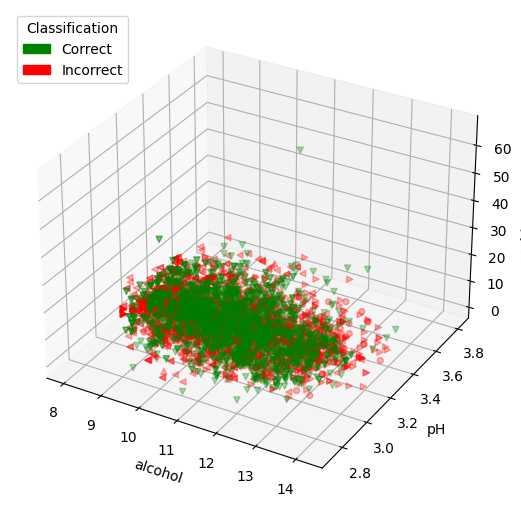

In [58]:

subset=['alcohol', 'pH', 'residual sugar']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = data[data['Correct']==True]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of correct classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='green')
# Plot incorrect
correct = data[data['Correct']==False]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of incorrect classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='red')
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
plt.savefig('./%s_%s_%s_true_class_classified_loss_white_1.png'%(subset[0], subset[1], subset[2]))

Number of correct classified points: 2198
Number of incorrect classified points: 2700


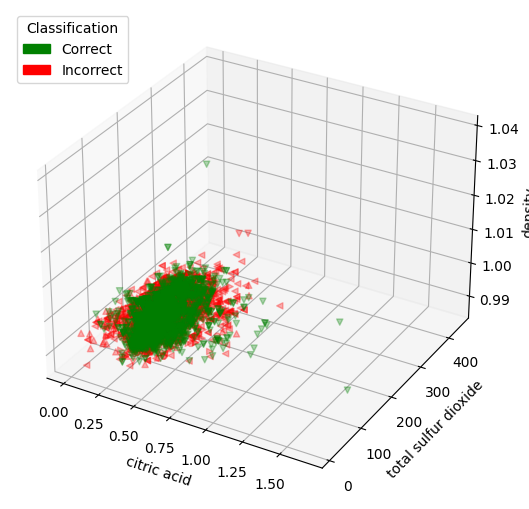

In [59]:

subset=['citric acid', 'total sulfur dioxide', 'density']
markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D']
fig = plt.figure(figsize = (5.5,5))
fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = data[data['Correct']==True]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of correct classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='green')
# Plot incorrect
correct = data[data['Correct']==False]
true_labels = correct.sort_index().index.unique().tolist()
print('Number of incorrect classified points: %d'%correct.shape[0])
for i, true_label in enumerate(true_labels):
    temp = correct.loc[true_label, :]
    xs = temp[subset[0]].tolist()
    ys = temp[subset[1]].tolist()
    zs = temp[subset[2]].tolist()
    ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='red')
ax.set_xlabel('%s'%subset[0])
ax.set_ylabel('%s'%subset[1])
ax.set_zlabel('%s'%subset[2])
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
plt.savefig('./%s_%s_%s_true_class_classified_loss_white_2.png'%(subset[0], subset[1], subset[2]))

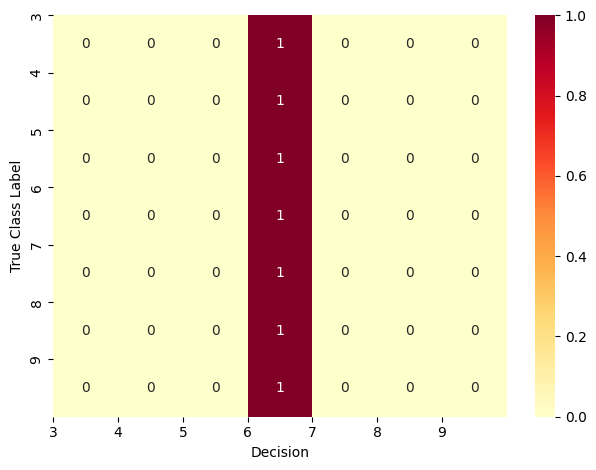

In [60]:
pred = data['ERM Classification'].tolist()
act  = data.index.tolist()
class_labels = data.sort_index().index.unique().tolist()
confusion = confusion_matrix(act, pred, normalize='true')
sns.heatmap(data=confusion,cmap="YlOrRd",annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Decision')
plt.ylabel('True Class Label')
positions = range(0,len(class_labels))
plt.xticks(positions, class_labels)
plt.yticks(positions, class_labels)
plt.tight_layout()
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_3\PART_A\decision_matrix_white.png')